In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

try:
  gpu = tf.config.list_physical_devices('GPU')[0]
  tf.config.experimental.set_memory_growth(gpu, True)
except:
  pass

In [ ]:
labels =  ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [ ]:
X_train = X_train.astype('float32') / 255
y_train = to_categorical(y_train)
print(X_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 10)


In [ ]:
X_test = X_test.astype('float32') / 255
y_test = to_categorical(y_test)
print(X_test.shape, y_test.shape)

(10000, 32, 32, 3) (10000, 10)


In [ ]:
inputs = keras.layers.Input(X_train.shape[1:])

x = keras.layers.Conv2D(64, 2, kernel_regularizer=keras.regularizers.L2())(inputs) # dot product in a 2x2 kernel (scanner)
x = keras.layers.BatchNormalization()(x)
x = keras.activations.relu(x)
x = keras.layers.AveragePooling2D(2, strides=1)(x) # average of a 2x2 kernel with a stride (step) of 1x1
x = keras.layers.Conv2D(128, 2, strides=2, kernel_regularizer=keras.regularizers.L2())(x)
x = keras.layers.BatchNormalization()(x)
x = keras.activations.relu(x)
x = keras.layers.MaxPooling2D(2, strides=1)(x)
x = keras.layers.Conv2D(256, 2, kernel_regularizer=keras.regularizers.L2(), activation='relu')(x)

x = keras.layers.Flatten()(x)

x = keras.layers.Dense(X_train.shape[1], kernel_regularizer=keras.regularizers.L2(), activation='relu')(x)
x = keras.layers.Dropout(.1)(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 31, 31, 64)        832       
                                                                 
 batch_normalization (Batch  (None, 31, 31, 64)        256       
 Normalization)                                                  
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 31, 31, 64)        0         
                                                                 
 average_pooling2d (Average  (None, 30, 30, 64)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 128)       32896 

In [ ]:
model.compile(
    loss = keras.losses.CategoricalCrossentropy(),
    optimizer = keras.optimizers.RMSprop(learning_rate=0.001),
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs=10, verbose=2)
model.evaluate(X_test, y_test)

Epoch 1/10
1563/1563 - 21s - loss: 1.9827 - accuracy: 0.4343 - 21s/epoch - 13ms/step
Epoch 2/10
1563/1563 - 9s - loss: 1.5264 - accuracy: 0.5249 - 9s/epoch - 6ms/step
Epoch 3/10
1563/1563 - 9s - loss: 1.4525 - accuracy: 0.5566 - 9s/epoch - 6ms/step
Epoch 4/10
1563/1563 - 9s - loss: 1.4185 - accuracy: 0.5646 - 9s/epoch - 6ms/step
Epoch 5/10
1563/1563 - 10s - loss: 1.3930 - accuracy: 0.5756 - 10s/epoch - 6ms/step
Epoch 6/10
1563/1563 - 9s - loss: 1.3765 - accuracy: 0.5826 - 9s/epoch - 6ms/step
Epoch 7/10
1563/1563 - 9s - loss: 1.3607 - accuracy: 0.5880 - 9s/epoch - 6ms/step
Epoch 8/10
1563/1563 - 9s - loss: 1.3500 - accuracy: 0.5890 - 9s/epoch - 6ms/step
Epoch 9/10
1563/1563 - 9s - loss: 1.3427 - accuracy: 0.5947 - 9s/epoch - 6ms/step
Epoch 10/10
1563/1563 - 9s - loss: 1.3349 - accuracy: 0.5991 - 9s/epoch - 6ms/step
313/313 [==============================] - 1s 4ms/step - loss: 1.4186 - accuracy: 0.5737


[1.4185659885406494, 0.5737000107765198]

In [ ]:
y_test_out = y_test.argmax(axis=1)
y_pred = model.predict(X_test, verbose=2).argmax(axis=1)

print(y_test_out, y_pred, sep='\n')

good = [(y_test_out[i] == y_pred[i]) for i in range(len(y_test_out))]

print('accuracy ratio:', sum(good)/len(good))

print('-'*20)

limit = 10
for i in range(len(good)):
  if not good[i]:
    print(f'predicted: {labels[y_pred[i]]}; true: {labels[y_test_out[i]]}; input at: {i}')
    limit -= 1
    if limit == 0: break

313/313 - 1s - 859ms/epoch - 3ms/step
[3 8 8 ... 5 1 7]
[5 1 8 ... 5 4 7]
accuracy ratio: 0.5737
--------------------
predicted: dog; true: cat; input at: 0
predicted: automobile; true: ship; input at: 1
predicted: horse; true: frog; input at: 5
predicted: deer; true: frog; input at: 7
predicted: truck; true: automobile; input at: 9
predicted: horse; true: airplane; input at: 10
predicted: frog; true: ship; input at: 15
predicted: dog; true: horse; input at: 17
predicted: truck; true: ship; input at: 18
predicted: bird; true: airplane; input at: 21


predicted: truck; true: ship; input at: 150



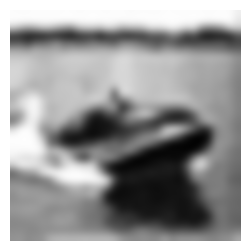

In [ ]:
i = 150
print(f'predicted: {labels[y_pred[i]]}; true: {labels[y_test_out[i]]}; input at: {i}', end='\n\n')

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(X_test[i], interpolation="bicubic")
ax.axis('off');